# Complex (Vector) Correlations

- reference: https://medium.com/@ns2586/geometric-interpretation-of-the-correlation-between-two-variables-4011fb3ea18e
- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
- https://numpy.org/doc/stable/reference/generated/numpy.correlate.html

## Specific PJS task 

C4 - C12, correlate bottom flow at each site to each depth for 2016, 2017, and 2018 of lowpass filtered data
+ output should be coefficient and angle

## Datasource and process
- erddap for unfiltered data access
- filter the data
- correlate the data or rotate and correlate if complex angle not available

## Load Data

In [1]:
from erddapy import ERDDAP
import numpy as np
import pandas as pd

import cmath

pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
server_url='http://akutan.pmel.noaa.gov:8080/erddap'
e = ERDDAP(server=server_url)
dataset = 'ADCP_Mooring_18ckp4a_final'


e.constraints = None
e.protocol = 'griddap'

opendap_url = e.get_download_url(
    dataset_id=dataset,
    response='opendap',
)

print(opendap_url)

http://akutan.pmel.noaa.gov:8080/erddap/griddap/ADCP_Mooring_18ckp4a_final


In [3]:
e.dataset_id=dataset
e.response = 'nc'
ds = e.to_xarray(decode_times=True)
ds

<xarray.Dataset>
Dimensions:    (depth: 9, latitude: 1, longitude: 1, time: 8870)
Coordinates:
  * time       (time) datetime64[ns] 2018-08-15T07:00:00 ... 2019-08-19T20:00:00
  * depth      (depth) float64 4.0 8.0 12.0 16.0 20.0 24.0 28.0 32.0 36.0
  * latitude   (latitude) float32 71.0437
  * longitude  (longitude) float64 199.5
Data variables:
    v_1206     (time, depth, latitude, longitude) float32 ...
    u_1205     (time, depth, latitude, longitude) float32 ...
    w_1204     (time, depth, latitude, longitude) float32 ...
    Werr_1201  (time, depth, latitude, longitude) float32 ...
Attributes:
    cdm_data_type:                 Grid
    COMPOSITE:                     1
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    CREATION_DATE:                 March 11, 2020 16:00 UTC
    creation_date:                 April 16, 2020 21:06 UTC
    DATA_CMNT:                     1774.VEL
    Easternmost_Easting:           199.49644470214844
    EPIC_FILE_GENERATOR:           nc_epic2udunits_time.py V0.4.0
    geospatial_lat_max:            71.0437
    geospatial_lat_min:            71.0437
    geospatial_lat_units:          degrees_north
    geospatial_lon_max:            199.49644470214844
    geospatial_lon_min:            199.49644470214844
    geospatial_lon_units:          degrees_east
    geospatial_vertical_max:       36.0
    geospatial_vertical_min:       4.0
    geospatial_vertical_positive:  down
    geospatial_vertical_units:     m
    History:                        \nMarch 11, 2020 16:00 UTC EPIC two time-...
    history:                       April 16, 2020 21:06 UTC EPIC two time-wor...
    infoUrl:                       https://pmel.noaa.gov/
    INST_TYPE:                     wcp
    institution:                   NOAA/PMEL - EcoFOCI
    keywords:                      currents, data, depth, eastward, error, lo...
    license:                       The data may be used and redistributed for...
    MOORING:                       18CKP-4A
    Northernmost_Northing:         71.0437
    sourceUrl:                     (local files)
    Southernmost_Northing:         71.0437
    standard_name_vocabulary:      CF Standard Name Table v55
    summary:                       QC'd (final) Gridded ADCP Vel Data from 18...
    time_coverage_end:             2019-08-19T20:00:00Z
    time_coverage_start:           2018-08-15T07:00:00Z
    title:                         QC'd (final) ADCP Vel Data from 18CKP-4A
    WATER_DEPTH:                   52.0
    WATER_MASS:                    B
    Westernmost_Easting:           199.49644470214844

In [4]:
ds.depth

<xarray.DataArray 'depth' (depth: 9)>
array([ 4.,  8., 12., 16., 20., 24., 28., 32., 36.])
Coordinates:
  * depth    (depth) float64 4.0 8.0 12.0 16.0 20.0 24.0 28.0 32.0 36.0
Attributes:
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down
    actual_range:            [ 4. 36.]
    axis:                    Z
    epic_code:               1
    ioos_category:           Location
    long_name:               Depth
    positive:                down
    standard_name:           depth
    type:                    UNEVEN
    units:                   m

In [5]:
bottom_v = ds.isel(depth=[0])[['u_1205','v_1206']]
bottom_v

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 1, longitude: 1, time: 8870)
Coordinates:
  * time       (time) datetime64[ns] 2018-08-15T07:00:00 ... 2019-08-19T20:00:00
  * depth      (depth) float64 4.0
  * latitude   (latitude) float32 71.0437
  * longitude  (longitude) float64 199.5
Data variables:
    u_1205     (time, depth, latitude, longitude) float32 -1.9961971 ... 2.36...
    v_1206     (time, depth, latitude, longitude) float32 2.839929 ... -18.14083
Attributes:
    cdm_data_type:                 Grid
    COMPOSITE:                     1
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    CREATION_DATE:                 March 11, 2020 16:00 UTC
    creation_date:                 April 16, 2020 21:06 UTC
    DATA_CMNT:                     1774.VEL
    Easternmost_Easting:           199.49644470214844
    EPIC_FILE_GENERATOR:           nc_epic2udunits_time.py V0.4.0
    geospatial_lat_max:            71.0437
    geospatial_lat_min:            71.0437
    geospatial_lat_units:          degrees_north
    geospatial_lon_max:            199.49644470214844
    geospatial_lon_min:            199.49644470214844
    geospatial_lon_units:          degrees_east
    geospatial_vertical_max:       36.0
    geospatial_vertical_min:       4.0
    geospatial_vertical_positive:  down
    geospatial_vertical_units:     m
    History:                        \nMarch 11, 2020 16:00 UTC EPIC two time-...
    history:                       April 16, 2020 21:06 UTC EPIC two time-wor...
    infoUrl:                       https://pmel.noaa.gov/
    INST_TYPE:                     wcp
    institution:                   NOAA/PMEL - EcoFOCI
    keywords:                      currents, data, depth, eastward, error, lo...
    license:                       The data may be used and redistributed for...
    MOORING:                       18CKP-4A
    Northernmost_Northing:         71.0437
    sourceUrl:                     (local files)
    Southernmost_Northing:         71.0437
    standard_name_vocabulary:      CF Standard Name Table v55
    summary:                       QC'd (final) Gridded ADCP Vel Data from 18...
    time_coverage_end:             2019-08-19T20:00:00Z
    time_coverage_start:           2018-08-15T07:00:00Z
    title:                         QC'd (final) ADCP Vel Data from 18CKP-4A
    WATER_DEPTH:                   52.0
    WATER_MASS:                    B
    Westernmost_Easting:           199.49644470214844

## Filter Data

In [6]:
import calc.lanzcos as lanzcos

def lanzcos_filter(data,params):
    """
    input: pandas dataframe
    """
    for var2filter_name in ['u_1205','v_1206']:
        ## missing data fill limited by number of hours to linearly interpolate
        temp = data[var2filter_name].interpolate(method='time',limit=6)

        # get index of missing data that wasn't filled
        # the remaining missing data will continue to be missing after analysis
        # this data and the edges of the timeseries need to have the effects of the filter window accounted for

        missing_index = np.isnan(temp)
        temp = data[var2filter_name].interpolate(method='time')

        #address gaps at beginning and end... back fill... and forward fill at end... 
        # the filter window will correct small gaps at the tails but will become worse as the leading gaps get bigger
        temp.bfill(inplace=True)
        temp.ffill(inplace=True)

        #filter data with lanzcos filter
        data[var2filter_name+'_f35'] = lanzcos.lanzcos(temp.values,1,35)

        data[var2filter_name+'_f35'] = lanzcos.lanzcos(temp.values,1,35)+data[var2filter_name].mean()
        data[var2filter_name+'_f35'][missing_index] = np.nan

        #remove boundaries of large gaps

        for index, row in data[np.isnan(data[var2filter_name+'_f35'])].iterrows():
            data[var2filter_name+'_f35'][index-datetime.timedelta(hours=17):index+datetime.timedelta(hours=17)] = np.nan

        #remove start/end boundaries
        for index in range(0,17):
            data.loc[data.index[index]][var2filter_name+'_f35'] =np.nan

        for index in range(len(data)-17,len(data)):
            data.loc[data.index[index]][var2filter_name+'_f35'] =np.nan
    return(data)

In [7]:
bottom_v_pd = bottom_v.to_dataframe()
bottom_v_pd.index = bottom_v_pd.index.droplevel([-4,-3,-2])
data = bottom_v_pd.resample('1H').mean() #mandate hourly data

## filter each vector independently
params = ['u_1205','v_1206'] #change based on variable to filter

bottom_v_filt = lanzcos_filter(bottom_v_pd.resample('1H').mean(),params)

depth_v_pd = (ds.isel(depth=[-1])[['u_1205','v_1206']]).to_dataframe()
depth_v_pd.index = depth_v_pd.index.droplevel([-4,-3,-2])

depth_v_filt = lanzcos_filter(depth_v_pd.resample('1H').mean(),params)

<AxesSubplot:xlabel='time'>

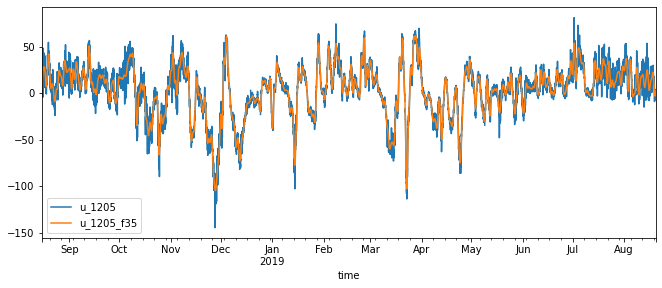

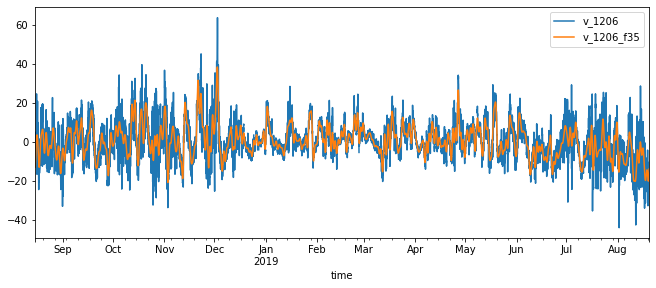

In [8]:
bottom_v_filt[['u_1205','u_1205_f35']].plot(figsize=(11,4.25))
bottom_v_filt[['v_1206','v_1206_f35']].plot(figsize=(11,4.25))

<AxesSubplot:xlabel='time'>

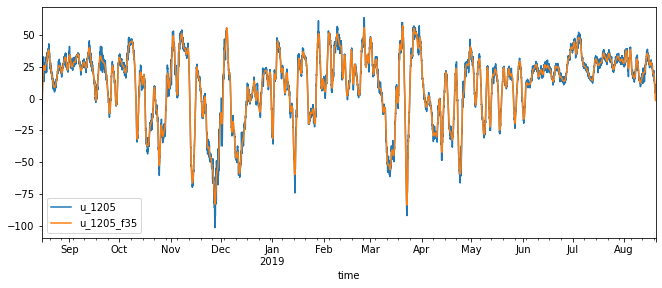

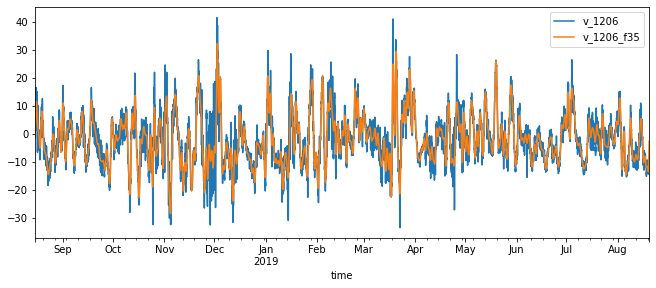

In [9]:
depth_v_filt[['u_1205','u_1205_f35']].plot(figsize=(11,4.25))
depth_v_filt[['v_1206','v_1206_f35']].plot(figsize=(11,4.25))

### from here on is an attempt at using pearson R and vector products to mimic covspc

In [10]:
#unit vector
def unit_vector(v):
    return v / np.linalg.norm(v)

bottom_unit = bottom_v.to_array()[:,:,0,0,0] / np.linalg.norm(bottom_v.to_array()[:,:,0,0,0],axis=0)

#angle is
"""
r=cos(theta)=a dot b / ||a|| ||b|| (same as - y = dot(x1,x2)/(norm(x1)*norm(x2)))
a: bottom
b: another depth
"""

'\nr=cos(theta)=a dot b / ||a|| ||b|| (same as - y = dot(x1,x2)/(norm(x1)*norm(x2)))\na: bottom\nb: another depth\n'

In [11]:
#variance
print(f"var1: {np.var(bottom_v_filt[['u_1205_f35','v_1206_f35']].values,axis=0)}")

print(f"var2: {np.var(depth_v_filt[['u_1205_f35','v_1206_f35']].values,axis=0)}")

print(f"cov: {np.cov(bottom_v_filt['u_1205_f35'].values,depth_v_filt['u_1205_f35'].values)}")

#corrcoef
np.corrcoef(bottom_v_filt[['u_1205_f35','v_1206_f35']].values,
            depth_v_filt[['u_1205_f35','v_1206_f35']].values,
            rowvar=False)

var1: [707.31878755  62.35391536]
var2: [671.80513066  73.40176886]
cov: [[707.39853936 664.66301344]
 [664.66301344 671.88087822]]


array([[ 1.        , -0.0387111 ,  0.96410268,  0.50483468],
       [-0.0387111 ,  1.        , -0.10610844,  0.48873133],
       [ 0.96410268, -0.10610844,  1.        ,  0.43758124],
       [ 0.50483468,  0.48873133,  0.43758124,  1.        ]])

In [12]:
#https://www.researchgate.net/post/Correlation_coefficient_for_vectorial_timeseries2
#make complex

bottom_comp = bottom_v_filt['u_1205_f35'].values+1j*bottom_v_filt['v_1206_f35']
depth_comp = depth_v_filt['u_1205_f35'].values+1j*depth_v_filt['v_1206_f35']

In [13]:
corrcoef = np.corrcoef(bottom_comp,depth_comp)
print("The modulus and angle of ",corrcoef[0,1]," is", cmath.polar(corrcoef[0,1]))
print(f"So the angle is {np.rad2deg(cmath.polar(corrcoef[0,1])[1])} degrees")

The modulus and angle of  (0.9211861790434633-0.1805618533826974j)  is (0.9387153771818646, -0.19355625144570585)
So the angle is -11.089956306211883 degrees


In [14]:
## Using only the U-component (so no rotation) is same as no i-component


bottom_comp = bottom_v_filt['u_1205_f35'].values
depth_comp = depth_v_filt['u_1205_f35'].values

corrcoef = np.corrcoef(bottom_comp,depth_comp)

print("The modulus and angle of ",corrcoef[0,1]," is", cmath.polar(corrcoef[0,1]))
print(f"So the angle is {np.rad2deg(cmath.polar(corrcoef[0,1])[1])} degrees")

The modulus and angle of  0.9641026847424652  is (0.9641026847424652, 0.0)
So the angle is 0.0 degrees


This is exactly the [1,0] or [0,1] value of the pearson matrix above

In [19]:
### loop over all depths at this site
#1 is one off bottom, 8 is top if ordered consistently
bottom_v_filt = ''
bottom_v_pd = (ds.isel(depth=[-1])[['u_1205','v_1206']]).to_dataframe()
bottom_v_pd.index = bottom_v_pd.index.droplevel([-4,-3,-2])

bottom_v_filt = lanzcos_filter(bottom_v_pd.resample('1H').mean(),params)


for k in range(0,ds.depth.size):
    print(f"Secondary Depth: {ds.depth[k].values}")
    depth_v_filt = ''
    depth_v_pd = (ds.isel(depth=[k])[['u_1205','v_1206']]).to_dataframe()
    depth_v_pd.index = depth_v_pd.index.droplevel([-4,-3,-2])

    depth_v_filt = lanzcos_filter(depth_v_pd.resample('1H').mean(),params)
    depth_v_filt.to_csv(dataset+'_'+str(ds.depth[k].values)+'m.csv')
    #make complex

    bottom_comp = bottom_v_filt['u_1205_f35'].values+1j*bottom_v_filt['v_1206_f35']
    depth_comp = depth_v_filt['u_1205_f35'].values+1j*depth_v_filt['v_1206_f35']
    
    corrcoef = np.corrcoef(bottom_comp,depth_comp)

    print("The modulus and angle of the complex correlation-coef",corrcoef[0,1]," is", cmath.polar(corrcoef[0,1]))
    print(f"So the angle is {np.rad2deg(cmath.polar(corrcoef[0,1])[1])} degrees")
    
    bottom_comp = bottom_v_filt['u_1205_f35'].values
    depth_comp = depth_v_filt['u_1205_f35'].values

    corrcoef = np.corrcoef(bottom_comp,depth_comp)

    print("If only the U component then the modulus and angle of ",corrcoef[0,1]," is", cmath.polar(corrcoef[0,1]))
    print(f"So the angle is {np.rad2deg(cmath.polar(corrcoef[0,1])[1])} degrees")
    UCoef =np.corrcoef(bottom_v_filt[['u_1205_f35','v_1206_f35']].values,
            depth_v_filt[['u_1205_f35','v_1206_f35']].values,
            rowvar=False)[0,2]
    print(f" Pearson U component only coef between two timeseries:{UCoef}")

Secondary Depth: 4.0
The modulus and angle of the complex correlation-coef (0.9211861790434632+0.18056185338269737j)  is (0.9387153771818645, 0.19355625144570585)
So the angle is 11.089956306211883 degrees
If only the U component then the modulus and angle of  0.9641026847424653  is (0.9641026847424653, 0.0)
So the angle is 0.0 degrees
 Pearson U component only coef between two timeseries:0.9641026847424653
Secondary Depth: 8.0
The modulus and angle of the complex correlation-coef (0.9455399494113298+0.18958362181581043j)  is (0.964358722464613, 0.1978791926413849)
So the angle is 11.337642591807532 degrees
If only the U component then the modulus and angle of  0.9840153553641143  is (0.9840153553641143, 0.0)
So the angle is 0.0 degrees
 Pearson U component only coef between two timeseries:0.9840153553641143
Secondary Depth: 12.0
The modulus and angle of the complex correlation-coef (0.9529239267704364+0.18759843935033105j)  is (0.9712142835946492, 0.1943804089519909)
So the angle is 1